# Assignment Number 03
Name: Mihir Unmesh Patil \\
PRN: 122B1B213 \\
Batch: C/C-3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine

In [3]:
df = pd.read_csv('/content/Data_Ass3.csv')
le = LabelEncoder()
df['Test_Class'] = le.fit_transform(df['Test_Class'])
X = df[['S1', 'S2']]
y = df['Test_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

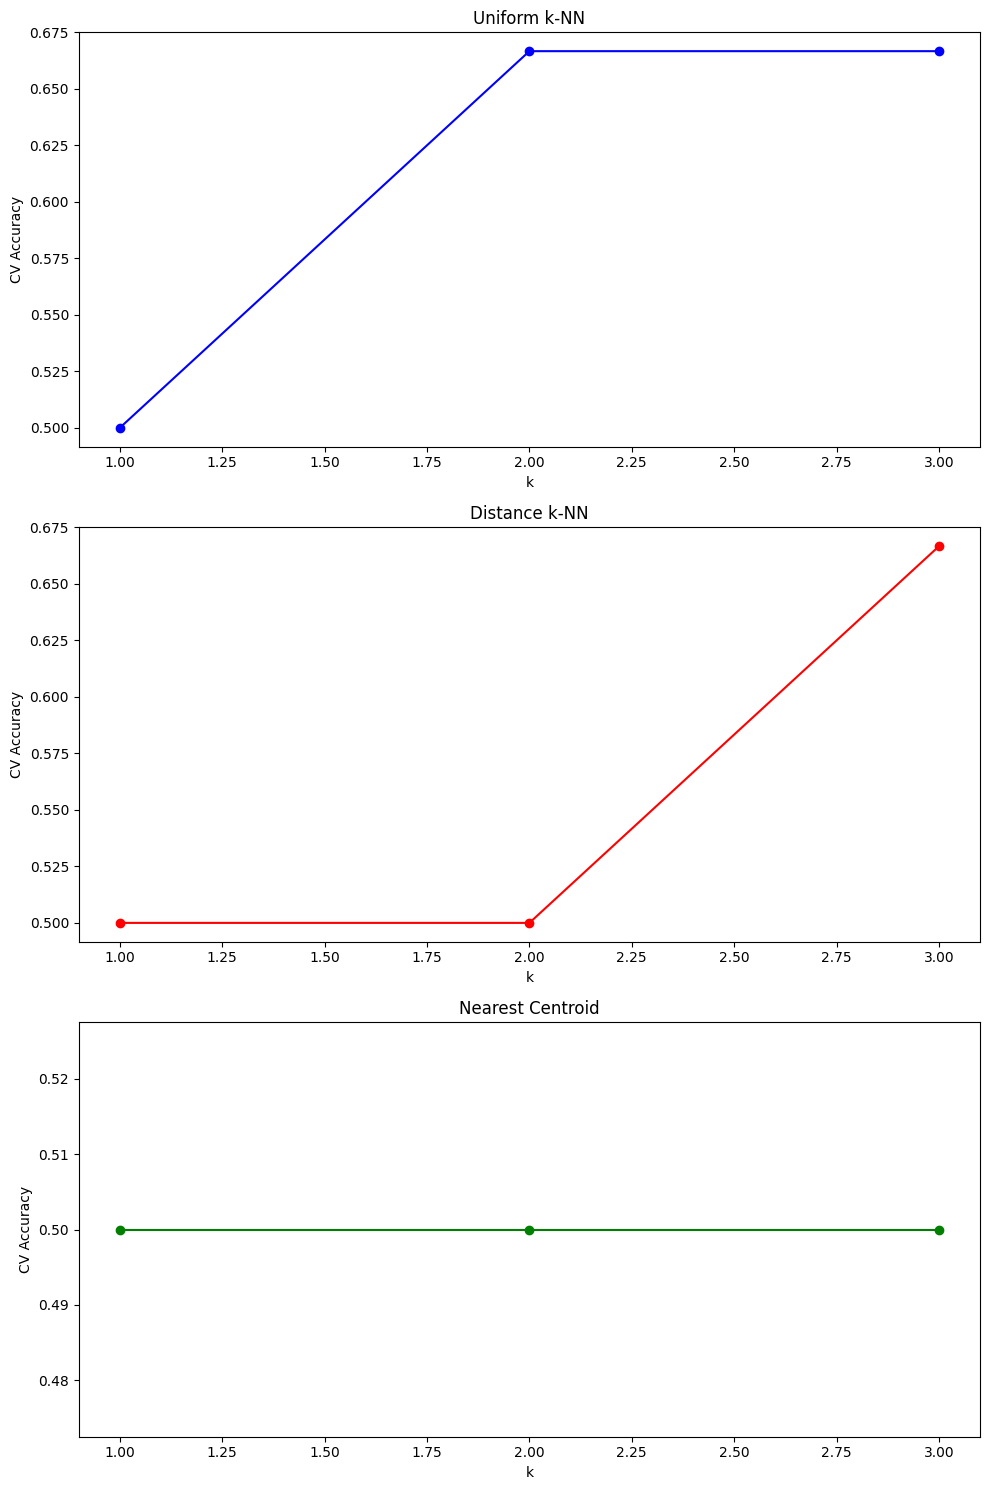

In [4]:
k_range = range(1, 4)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

k_scores_uniform = []
k_scores_distance = []
k_scores_nc = []
for k in k_range:
    knn_uniform = KNeighborsClassifier(n_neighbors=k)
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    nc = NearestCentroid()

    knn_uniform.fit(X_train, y_train)
    knn_distance.fit(X_train, y_train)
    nc.fit(X_train, y_train)

    score_uniform = cross_val_score(knn_uniform, X, y, cv=2).mean()
    score_distance = cross_val_score(knn_distance, X, y, cv=2).mean()
    score_nc = cross_val_score(nc, X, y, cv=2).mean()

    k_scores_uniform.append(score_uniform)
    k_scores_distance.append(score_distance)
    k_scores_nc.append(score_nc)

axs[0].plot(k_range, k_scores_uniform, 'b-o')
axs[0].set_title('Uniform k-NN')
axs[0].set_xlabel('k')
axs[0].set_ylabel('CV Accuracy')

axs[1].plot(k_range, k_scores_distance, 'r-o')
axs[1].set_title('Distance k-NN')
axs[1].set_xlabel('k')
axs[1].set_ylabel('CV Accuracy')

axs[2].plot(k_range, k_scores_nc, 'g-o')
axs[2].set_title('Nearest Centroid')
axs[2].set_xlabel('k')
axs[2].set_ylabel('CV Accuracy')

plt.tight_layout()
plt.show()

In [5]:
k_best = k_range[np.argmax(k_scores_uniform)]  # Using uniform as primary metric
print(f"Best k for small dataset: {k_best}")

knn_uniform = KNeighborsClassifier(n_neighbors=k_best)
knn_distance = KNeighborsClassifier(n_neighbors=k_best, weights='distance')
nc = NearestCentroid()

knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)
nc.fit(X_train, y_train)

point = pd.DataFrame([[6, 6]], columns=['S1', 'S2'])
pred_uniform = knn_uniform.predict(point)
pred_distance = knn_distance.predict(point)
pred_nc = nc.predict(point)

print("\nPredictions for (6,6):")
print(f"Uniform k-NN: {le.inverse_transform(pred_uniform)[0]}")
print(f"Distance k-NN: {le.inverse_transform(pred_distance)[0]}")
print(f"Nearest Centroid: {le.inverse_transform(pred_nc)[0]}")

Best k for small dataset: 2

Predictions for (6,6):
Uniform k-NN: Negative
Distance k-NN: Negative
Nearest Centroid: Negative


In [6]:
y_pred_uniform = knn_uniform.predict(X_test)
acc_uniform = accuracy_score(y_test, y_pred_uniform)
print("\nUniform k-NN Results:")
print(f"Train Accuracy: {accuracy_score(y_train, knn_uniform.predict(X_train))}")
print(f"Test Accuracy: {acc_uniform}")
print(f"CV Mean: {cross_val_score(knn_uniform, X, y, cv=2).mean()}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_uniform, labels=[0,1]))
print("Classification Report:")
print(classification_report(y_test, y_pred_uniform, zero_division=0))


Uniform k-NN Results:
Train Accuracy: 0.5
Test Accuracy: 1.0
CV Mean: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [7]:
y_pred_distance = knn_distance.predict(X_test)
acc_distance = accuracy_score(y_test, y_pred_distance)
print("\nDistance k-NN Results:")
print(f"Train Accuracy: {accuracy_score(y_train, knn_distance.predict(X_train))}")
print(f"Test Accuracy: {acc_distance}")
print(f"CV Mean: {cross_val_score(knn_distance, X, y, cv=2).mean()}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_distance, labels=[0,1]))
print("Classification Report:")
print(classification_report(y_test, y_pred_distance, zero_division=0))


Distance k-NN Results:
Train Accuracy: 1.0
Test Accuracy: 0.0
CV Mean: 0.5
Confusion Matrix:
[[0 2]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [8]:
y_pred_nc = nc.predict(X_test)
acc_nc = accuracy_score(y_test, y_pred_nc)
print("\nNearest Centroid Results:")
print(f"Train Accuracy: {accuracy_score(y_train, nc.predict(X_train))}")
print(f"Test Accuracy: {acc_nc}")
print(f"CV Mean: {cross_val_score(nc, X, y, cv=2).mean()}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nc, labels=[0,1]))
print("Classification Report:")
print(classification_report(y_test, y_pred_nc, zero_division=0))


Nearest Centroid Results:
Train Accuracy: 0.5
Test Accuracy: 1.0
CV Mean: 0.5
Confusion Matrix:
[[2 0]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [34]:
wine = load_wine()
X_large = wine.data[:, :2]
y_large = wine.target
X_large_df = pd.DataFrame(X_large, columns=['feature1', 'feature2'])
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_large_df, y_large, test_size=0.2, random_state=42)

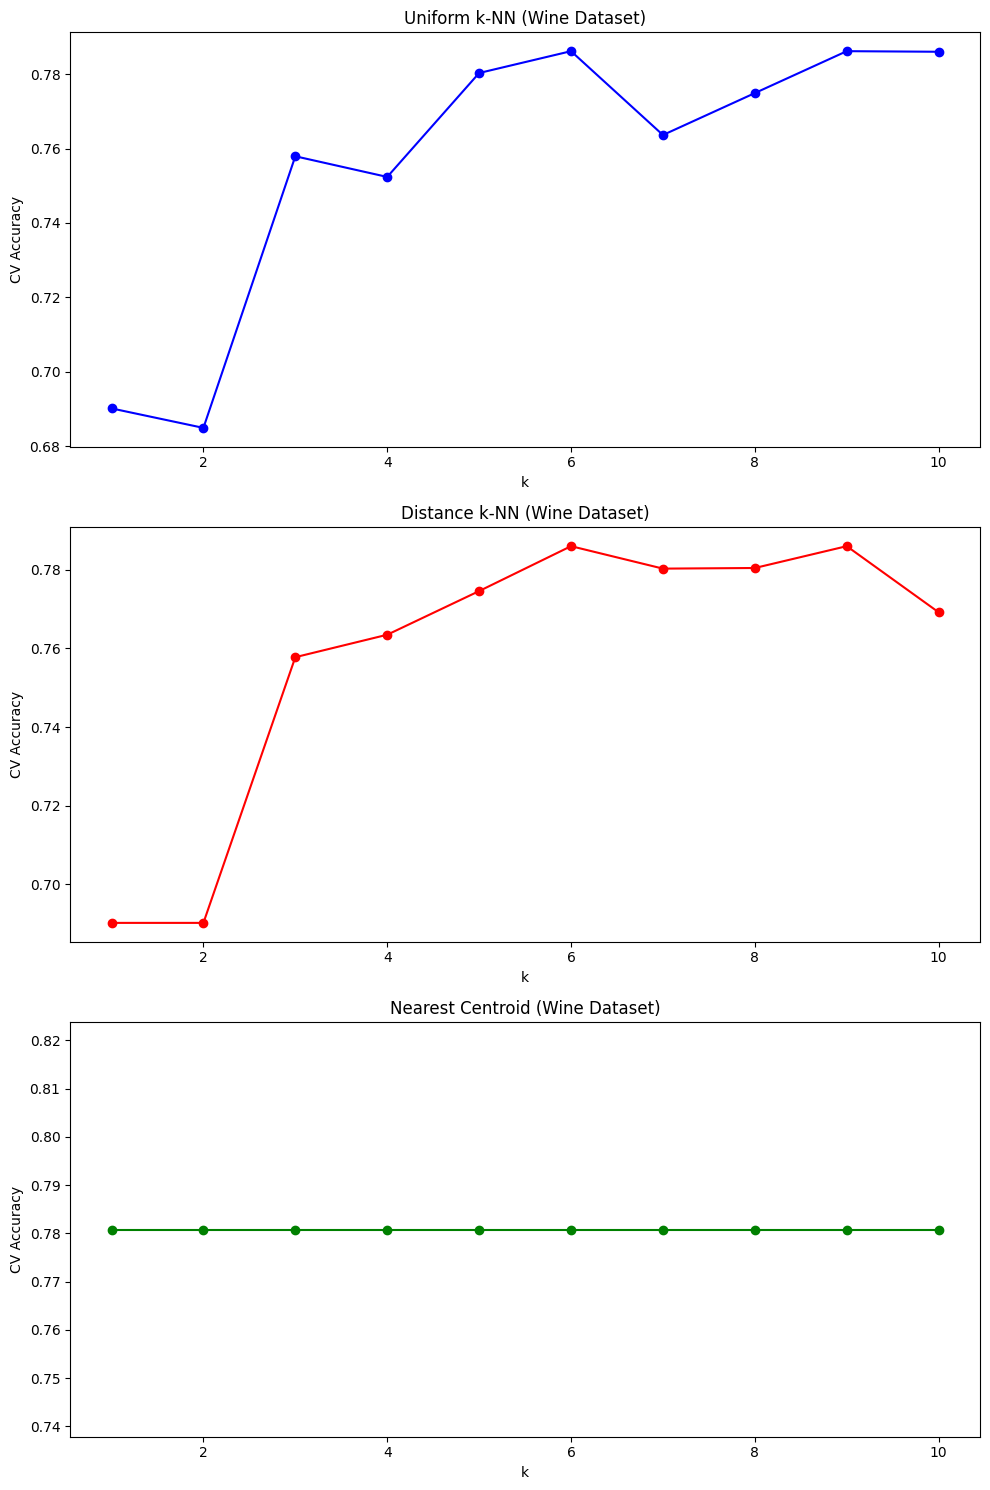

In [35]:
# Tune k (1 to 10)
k_range = range(1, 11)
cv_scores = []
test_accuracies = []
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
k_scores_uniform_l = []
k_scores_distance_l = []
k_scores_nc_l = []

for k in k_range:
    knn_uniform = KNeighborsClassifier(n_neighbors=k)
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    nc = NearestCentroid()

    knn_uniform.fit(X_train_l, y_train_l)
    knn_distance.fit(X_train_l, y_train_l)
    nc.fit(X_train_l, y_train_l)

    score_uniform = cross_val_score(knn_uniform, X_large_df, y_large, cv=5).mean()
    score_distance = cross_val_score(knn_distance, X_large_df, y_large, cv=5).mean()
    score_nc = cross_val_score(nc, X_large_df, y_large, cv=5).mean()

    k_scores_uniform_l.append(score_uniform)
    k_scores_distance_l.append(score_distance)
    k_scores_nc_l.append(score_nc)

axs[0].plot(k_range, k_scores_uniform_l, 'b-o')
axs[0].set_title('Uniform k-NN (Wine Dataset)')
axs[0].set_xlabel('k')
axs[0].set_ylabel('CV Accuracy')

axs[1].plot(k_range, k_scores_distance_l, 'r-o')
axs[1].set_title('Distance k-NN (Wine Dataset)')
axs[1].set_xlabel('k')
axs[1].set_ylabel('CV Accuracy')

axs[2].plot(k_range, k_scores_nc_l, 'g-o')
axs[2].set_title('Nearest Centroid (Wine Dataset)')
axs[2].set_xlabel('k')
axs[2].set_ylabel('CV Accuracy')

plt.tight_layout()
plt.show()

In [36]:
k_best_l = k_range[np.argmax(k_scores_uniform_l)]
print(f"Best k for Wine dataset: {k_best_l}")

# Train models on Wine dataset
knn_uniform_l = KNeighborsClassifier(n_neighbors=k_best_l)
knn_distance_l = KNeighborsClassifier(n_neighbors=k_best_l, weights='distance')
nc_l = NearestCentroid()

knn_uniform_l.fit(X_train_l, y_train_l)
knn_distance_l.fit(X_train_l, y_train_l)
nc_l.fit(X_train_l, y_train_l)

point_l = pd.DataFrame([[6, 6]], columns=['feature1', 'feature2'])
pred_uniform_l = knn_uniform_l.predict(point_l)
pred_distance_l = knn_distance_l.predict(point_l)
pred_nc_l = nc_l.predict(point_l)

print("\nWine Dataset Predictions for (6,6):")
print(f"Uniform k-NN: {pred_uniform_l[0]}")
print(f"Distance k-NN: {pred_distance_l[0]}")
print(f"Nearest Centroid: {pred_nc_l[0]}")


Best k for Wine dataset: 6

Wine Dataset Predictions for (6,6):
Uniform k-NN: 1
Distance k-NN: 1
Nearest Centroid: 1


In [37]:
y_pred_uniform_l = knn_uniform_l.predict(X_test_l)
acc_uniform_l = accuracy_score(y_test_l, y_pred_uniform_l)

print("\nWine - Uniform k-NN Results:")
print(f"Train Accuracy: {accuracy_score(y_train_l, knn_uniform_l.predict(X_train_l))}")
print(f"Test Accuracy: {acc_uniform_l}")
print(f"CV Mean: {cross_val_score(knn_uniform_l, X_large_df, y_large, cv=5).mean()}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_l, y_pred_uniform_l))
print("Classification Report:")
print(classification_report(y_test_l, y_pred_uniform_l))


Wine - Uniform k-NN Results:
Train Accuracy: 0.8309859154929577
Test Accuracy: 0.8333333333333334
CV Mean: 0.7861904761904762
Confusion Matrix:
[[11  0  3]
 [ 0 12  2]
 [ 1  0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       1.00      0.86      0.92        14
           2       0.58      0.88      0.70         8

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.82        36
weighted avg       0.88      0.83      0.84        36



In [38]:
y_pred_distance_l = knn_distance_l.predict(X_test_l)
acc_distance_l = accuracy_score(y_test_l, y_pred_distance_l)

print("\nWine - Distance k-NN Results:")
print(f"Train Accuracy: {accuracy_score(y_train_l, knn_distance_l.predict(X_train_l))}")
print(f"Test Accuracy: {acc_distance_l}")
print(f"CV Mean: {cross_val_score(knn_distance_l, X_large_df, y_large, cv=5).mean()}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_l, y_pred_distance_l))
print("Classification Report:")
print(classification_report(y_test_l, y_pred_distance_l))


Wine - Distance k-NN Results:
Train Accuracy: 1.0
Test Accuracy: 0.8333333333333334
CV Mean: 0.7860317460317461
Confusion Matrix:
[[12  0  2]
 [ 0 11  3]
 [ 1  0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       1.00      0.79      0.88        14
           2       0.58      0.88      0.70         8

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.82        36
weighted avg       0.88      0.83      0.84        36



In [39]:
y_pred_nc_l = nc_l.predict(X_test_l)
acc_nc_l = accuracy_score(y_test_l, y_pred_nc_l)

print("\nWine - Nearest Centroid Results:")
print(f"Train Accuracy: {accuracy_score(y_train_l, nc_l.predict(X_train_l))}")
print(f"Test Accuracy: {acc_nc_l}")
print(f"CV Mean: {cross_val_score(nc_l, X_large_df, y_large, cv=5).mean()}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_l, y_pred_nc_l))
print("Classification Report:")
print(classification_report(y_test_l, y_pred_nc_l))


Wine - Nearest Centroid Results:
Train Accuracy: 0.795774647887324
Test Accuracy: 0.75
CV Mean: 0.7807936507936508
Confusion Matrix:
[[11  0  3]
 [ 1 11  2]
 [ 2  1  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.92      0.79      0.85        14
           2       0.50      0.62      0.56         8

    accuracy                           0.75        36
   macro avg       0.73      0.73      0.73        36
weighted avg       0.77      0.75      0.76        36



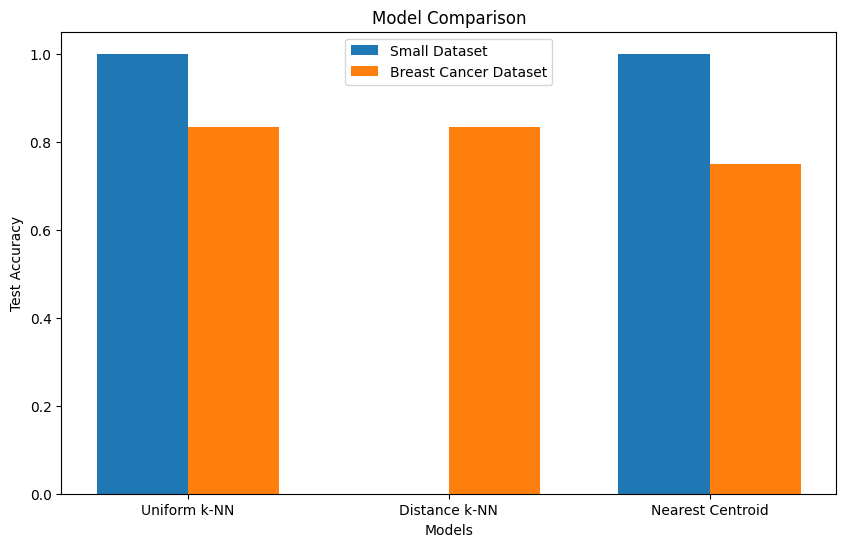

In [40]:
models = ['Uniform k-NN', 'Distance k-NN', 'Nearest Centroid']
acc_small = [acc_uniform, acc_distance, acc_nc]
acc_large = [acc_uniform_l, acc_distance_l, acc_nc_l]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, acc_small, width, label='Small Dataset')
plt.bar(x + width/2, acc_large, width, label='Breast Cancer Dataset')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()

End of Assignment